In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

### Семинарская работа

In [ ]:
G = nx.Graph()

In [ ]:
G.add_edges_from([("Алиса", "Дарья"), ("Дарья", "Степан"), ("Алиса", "Акбарбек"), ("Алиса", "Степан")])

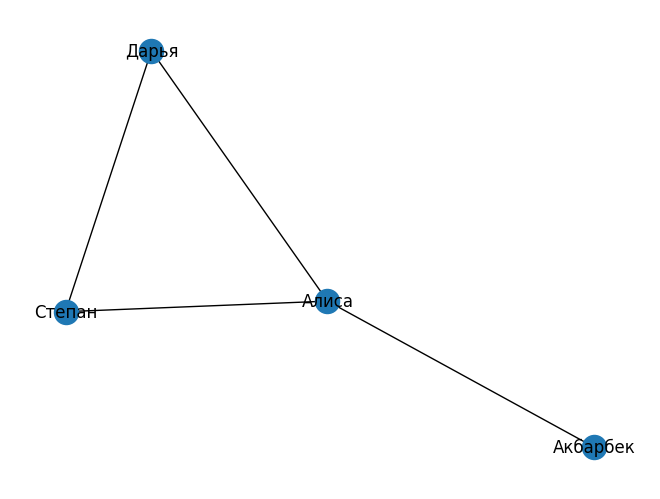

In [ ]:
nx.draw(G, with_labels = True)

In [ ]:
G2 = nx.DiGraph(G)

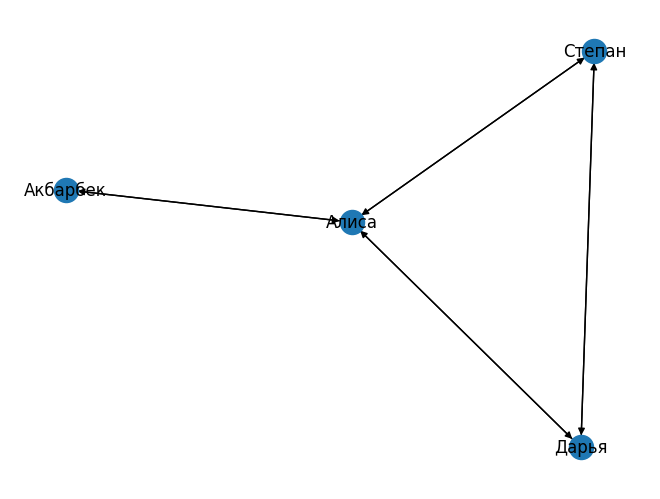

In [ ]:
nx.draw(G2, with_labels = True)

In [ ]:
elist=[("Алиса", "Дарья", 0.8), ("Дарья", "Степан", 0.1), ("Алиса", "Акбарбек", 1), ("Алиса", "Степан", 0.2)]
G2.add_weighted_edges_from(elist)

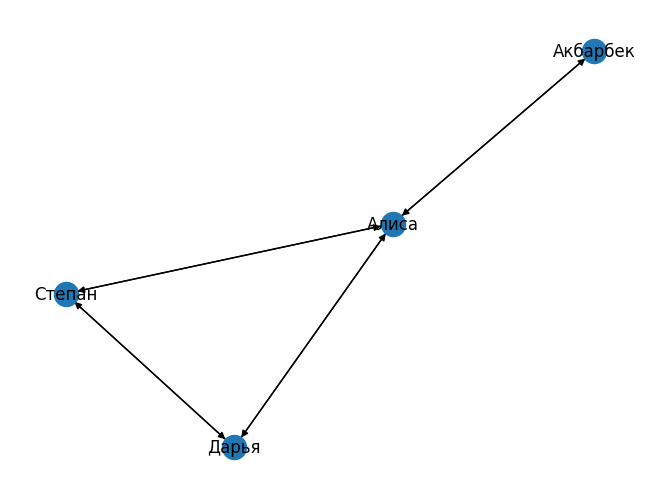

In [ ]:
nx.draw(G2, with_labels = True)

In [ ]:
G2.nodes

NodeView(('Алиса', 'Дарья', 'Степан', 'Акбарбек'))

In [ ]:
G2nodes = list(G2.nodes)
G2neighbors = [len(G2[node]) for node in G2nodes]
G2neighbors

[3, 2, 2, 1]

In [ ]:
node_sizes = [size*500 for size in G2neighbors]
node_sizes

[1500, 1000, 1000, 500]

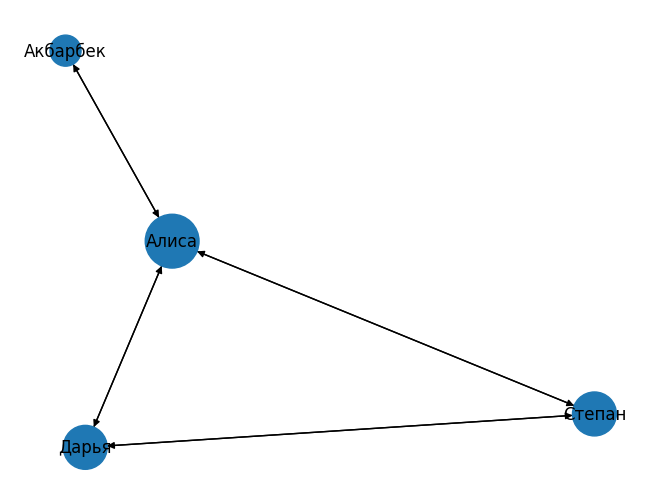

In [ ]:
nx.draw(G2, with_labels = True, node_size=node_sizes)

### Домашнее задание: скачать с кэгла датасет и построить граф

In [ ]:
!pip install -q opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
from collections import Counter, OrderedDict
import seaborn as sns
from matplotlib.lines import Line2D

#### Функции, используемые для задания

In [ ]:
def get_skills(list_of_skills): # функция для базовой предобработки текста
  return ''.join(list_of_skills).lower().split(', ')

In [ ]:
def my_combinations(list_of_skills, result): # эта и следующая функции используются для создания
  for i in range(len(list_of_skills)): # списка кортежей из списка списков для построения edges (краев)
    for j in range(len(list_of_skills)):
      tup = (list_of_skills[i], list_of_skills[j])
      if tup not in result and list_of_skills[i]!=list_of_skills[j]:
        result.append(tup)
  return result

In [ ]:
def get_combinations(whole_list):
  result = []
  for list_of_skills in whole_list:
    result = my_combinations(list_of_skills, result)
  return result

In [ ]:
def get_color(role): # функция, используемая для определения цвета в зависимости от должности
  if role == 'Senior Data Scientist':
    markcolor = 'green'
  elif role == 'Data Scientist':
    markcolor = 'blue'
  else:
    markcolor = 'orange'
  return markcolor

#### Импорт и предобработка данных

Для данного задания был взят датасет с каггла https://www.kaggle.com/datasets/anandhuh/data-science-jobs-in-india, в котором находится информация о 12000 разных вакансий в IT сфере в Индии. Датасет включает в себя следующие колонки:


*   Job role - Название должности
*   Company - Наименование компании
*   Location - Местонахождение компании
*   Job Experience - Требуемый опыт работы
*   Skills/Description - Требуемые навыки работы


Для данного задания для нас имеет значение только последняя колонка с информацией о требуемых навыках на должности.



Для авторизации на каггле:\
\
username: alicenet\
key: 10a6918d32e00d2618130763217daa69

In [ ]:
od.download("https://www.kaggle.com/datasets/anandhuh/data-science-jobs-in-india")

Skipping, found downloaded files in "./data-science-jobs-in-india" (use force=True to force download)


In [ ]:
jobs_data = pd.read_csv('/content/data-science-jobs-in-india/naukri_data_science_jobs_india.csv')
jobs_data.head()

,Job_Role,Company,Location,Job Experience,Skills/Description
0,Senior Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",3-6,"python, MLT, statistical modeling, machine lea..."
1,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Data Science, Machine learning, Python, Azure,..."
2,Applied Data Scientist / ML Senior Engineer (P...,SAP India Pvt.Ltd,Bangalore/Bengaluru,5-10,"Python, IT Skills, Testing, Cloud, Product Man..."
3,Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",1-4,"python, machine learning, Data Science, data a..."
4,Data Scientist,Walmart,Bangalore/Bengaluru,4-8,"IT Skills, Python, Data Science, Machine Learn..."


In [ ]:
jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job_Role            12000 non-null  object
 1   Company             12000 non-null  object
 2   Location            12000 non-null  object
 3   Job Experience      12000 non-null  object
 4   Skills/Description  12000 non-null  object
dtypes: object(5)
memory usage: 468.9+ KB


Так как датасет включает в себя 12000 строк данных, в рамках данного задания для наглядности и в ознакомительных целях будет взята только малая часть датасета (5 разных вакансий).

In [ ]:
jobs_data = jobs_data[:5]

In [ ]:
skills = jobs_data['Skills/Description'].apply(get_skills)
skills = skills.to_list()  # все встречаемые навыки
unique_skills = list({x for l in skills for x in l})  # уникальные навыки для построения nodes (узлов)
unique_skills[:10]

['product management',
 'it skills',
 'advanced analytics',
 'biqquery',
 'cloud computing',
 'data analysis',
 'scala',
 'data science',
 'deep learning',
 'tensorflow']

In [ ]:
print(f'Количество уникальных навыков: {len(unique_skills)}\nКоличество всех встречаемых навыков: {sum(len(v) for v in skills)}')

Количество уникальных навыков: 26
Количество всех встречаемых навыков: 38


#### Построение графа

In [ ]:
G_skills = nx.Graph()
G_skills.add_nodes_from(unique_skills)
G_skills.add_edges_from(get_combinations(skills))

In [ ]:
Gnodes = list(G_skills.nodes)
Gneighbors = [len(G_skills[node]) for node in Gnodes] # нахождение количества соседей

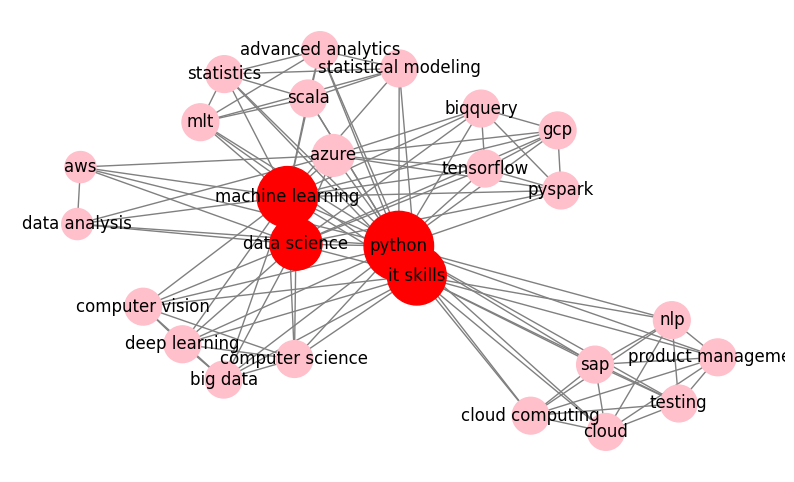

In [ ]:
colour_map = ['red' if x > 10 else 'pink' for x in Gneighbors]
fig, ax = plt.subplots(figsize=(10, 6))
nx.draw(G_skills, with_labels=True, node_size=[size*100 for size in Gneighbors], node_color=colour_map, edge_color = 'gray')
plt.show()

In [ ]:
counts = OrderedDict(Counter(sum(skills, [])).most_common())

<ipython-input-210-aa698ed39196>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.keys(), y=counts.values(), ax=ax, palette=cols)


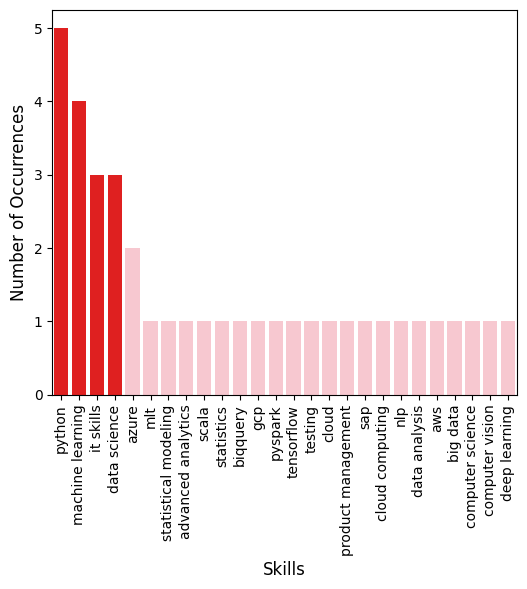

In [ ]:
cols = ['red' if x > 2 else 'pink' for x in counts.values()]
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=counts.keys(), y=counts.values(), ax=ax, palette=cols)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_xlabel('Skills', fontsize=12)
ax.xaxis.set_tick_params(rotation=90)

**Выводы по графу:**\
По данной выборке данных, состоящих из 5 разных вакансий в сфере IT, можно точно заявить, что такие навыки, как знание Питона или навык "it skills" (базовые знания в сфере IT) более востребованы при приеме на работу. Навык "python" встретился во всех вакансиях, которые были рассмотрены, из чего можно сделать вывод, что знание Питона является явным преимуществом при устройстве на работу в IT сфере.

#### Граф навыков по названию должности

In [ ]:
dic = {}  # Создание словаря вида навык:наименование должности, где навык требуется
for i in range(len(skills)):
  for j in range(len(skills[i])):
    if skills[i][j] not in dic.keys():
      dic[skills[i][j]] = []
    dic[skills[i][j]].append(jobs_data['Job_Role'][i])

In [ ]:
role_color_map = []  # Создание карты цветов по должностям
for skill in unique_skills:
  if len(dic[skill]) > 1:
    role_color_map.append('darkgray')
  else:
    role_color_map.append(get_color(''.join(dic[skill])))

In [ ]:
# Добавление легенды
role_legend = [Line2D([0], [0], marker='o', color='w', label='Common', markerfacecolor='darkgray', markersize=10, alpha=0.8)]
for role in jobs_data['Job_Role'].unique():
  role_legend.append(Line2D([0], [0], marker='o', color='w', label=role, markerfacecolor=get_color(role), markersize=10, alpha=0.8))

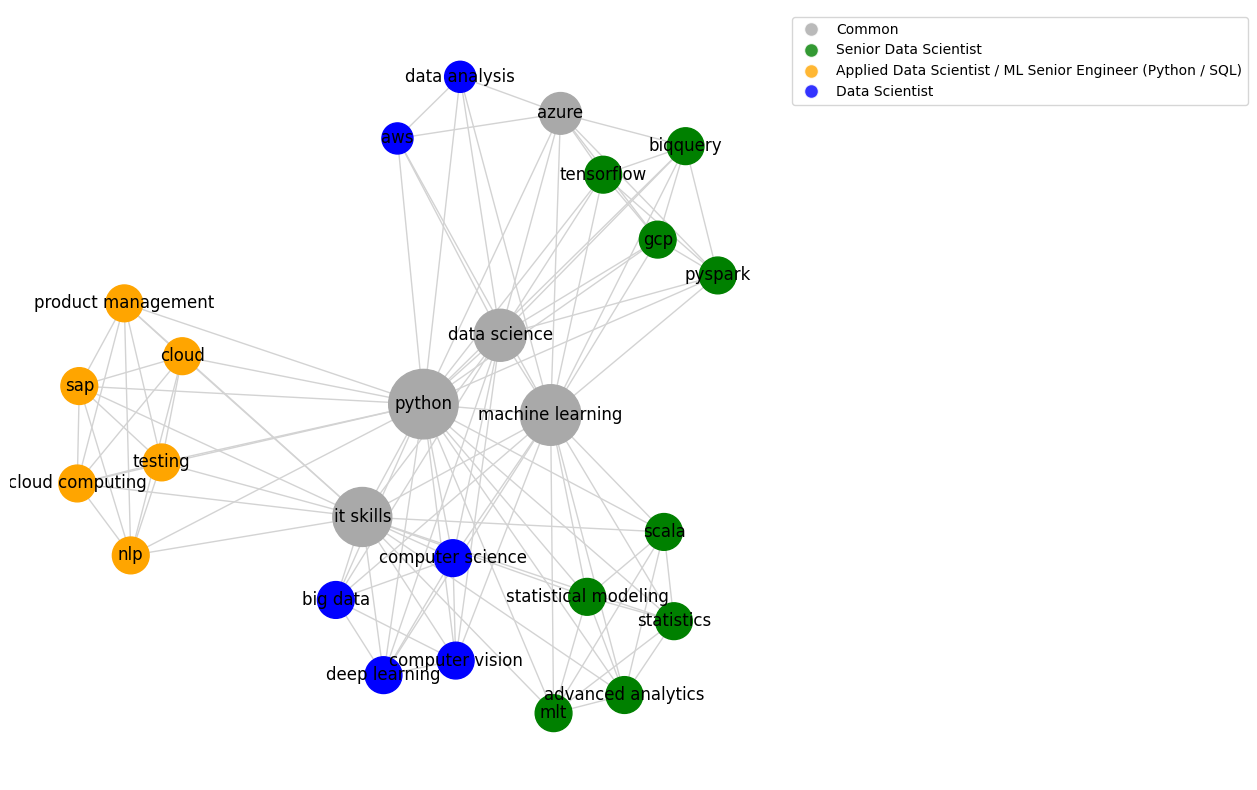

In [ ]:
colour_map = ['red' if x > 10 else 'pink' for x in Gneighbors]
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G_skills, with_labels=True, node_size=[size*100 for size in Gneighbors], node_color=role_color_map, edge_color = 'lightgray')
ax.legend(handles=role_legend, bbox_to_anchor=(1, 1))
plt.show()

**Выводы по графу:**\
Граф наглядно показывает взаимосвязь различных навыков в зависимости от должности: такие навыки, как python, it skills, machine learning, data science и azure встречаются не раз в вакансиях на разные должности, поэтому мы их можем назвать базовыми; когда как существуют узконаправленные навыки, как, например, product management или умение работы с tensorflow, которые явно требуются для более узких специальностей.